In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [39]:
def merge_portfolio_with_location(portfolio_data: pd.DataFrame, location_data: pd.DataFrame) -> pd.DataFrame:
    portfolio_data = portfolio_data.copy()
    location_data = location_data.copy()
    
    portfolio_data['Obligor Name'] = portfolio_data['Obligor Name'].str.upper().str.strip()
    location_data['Obligor Name'] = location_data['Obligor Name'].str.upper().str.strip()
    merged_data = pd.merge(
        portfolio_data,
        location_data[['Obligor Name', 'County', 'State', 'ZIP', 'Latitude', 'Longitude']],
        on='Obligor Name',
        how='left'
    )
    unmatched = merged_data[merged_data['Latitude'].isna()]

    print(f"Unmatched rows: {len(unmatched)}")
    return merged_data

In [40]:
!pwd

/home/kaushal/Desktop/Assignment/BLK-Assignment


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
def load_data():
    portfolio_data = pd.read_excel("data/PortfolioX.xlsx")
    location_data = pd.read_excel("data/location_data.xlsx")
    merged_data = merge_portfolio_with_location(portfolio_data, location_data)
    
    return portfolio_data, location_data, merged_data

In [43]:
def clean_data(df):
    df_clean = df.dropna(subset=["Latitude", "Longitude", "Obligor Name"])
    df_unique = df_clean.drop_duplicates(subset=["Obligor Name", "Latitude", "Longitude"])
    df_unique = df_unique.reset_index(drop=True)
    print(f"Final unique entries: {df_unique.shape[0]}")
    df_unique.head()
    
    return df_unique

In [44]:
portfolio_data, location_data, merged_data= load_data()

Unmatched rows: 568


In [45]:
excel_file = pd.ExcelFile("data/PortfolioX.xlsx")
print(excel_file.sheet_names) 
sector_dcodes = pd.read_excel(excel_file, sheet_name='sector dcodes')
portX = pd.read_excel(excel_file, sheet_name='portX')

['portX', 'sector dcodes']


In [46]:
location_data=clean_data(location_data)

Final unique entries: 3908


In [47]:
location_data.head(5)

,Obligor Name,County Code,County,State,CBSA,CBSA_title,Latitude,ZIP,Longitude
0,Broward Cnty Fla Port Auth,12011.0,"Broward, FL",FL,33100.0,"Miami-Fort Lauderdale-West Palm Beach, FL",26.1216,33301,-80.1288
1,Hawaii (State Of),15003.0,"Honolulu, HI",HI,46520.0,"Urban Honolulu, HI",21.3179,96813,-157.8521
2,Intermountain Pwr Agy Utah,49035.0,"Salt Lake, UT",UT,41620.0,"Salt Lake City, UT",40.5541,84095,-111.9539
3,New Jersey St Turnpike Authority,34023.0,"Middlesex, NJ",NJ,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",40.5560,07095,-74.2845
4,Triborough Bridge & Tunnel Authority,36061.0,"New York, NY",NY,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",40.8011,10035,-73.9371


In [48]:
portfolio_data.head(5)

,cusip,Obligor,Obligor Name,maturity,coupon,Sec_Group,Sec_Type,book_yield,unrealized_gl,Par,Rating,Outlook,Sector_Level_1,Sector
0,546398ZP6,009158,AIR PRODUCTS AND CHEMICALS INC,2043-12-01,-99.000,CASH,MVRDN,3.00000,0.00000,37000000.0,A1,NaN,CORP,CHEM
1,56678TAA7,201723,COMMERCIAL METALS COMPANY,2047-10-15,4.000,BND,MUNI,3.65993,-861401.04000,7175000.0,BB1,Stable,CORP,METL
2,64984EDG7,209111,CONSOLIDATED EDISON COMPANY OF NEW YORK INC,2039-05-01,-99.000,CASH,MVRDN,4.55000,99999.90000,100000.0,BBB1,Stable,CORP,ELEC
3,4423485T1,210795,UNITED AIRLINES INC,2038-07-15,6.625,BND,MUNI,4.05000,-12979.08765,405000.0,BB3,Stable,CORP,AIRL
4,13050RAA0,210795,UNITED AIRLINES INC,2029-07-15,4.000,BND,MUNI,4.23300,32715.02500,2500000.0,BB3,Stable,CORP,AIRL


In [49]:
merged_data.head(5)

,cusip,Obligor,Obligor Name,maturity,coupon,Sec_Group,Sec_Type,book_yield,unrealized_gl,Par,Rating,Outlook,Sector_Level_1,Sector,County,State,ZIP,Latitude,Longitude
0,546398ZP6,009158,AIR PRODUCTS AND CHEMICALS INC,2043-12-01,-99.000,CASH,MVRDN,3.00000,0.00000,37000000.0,A1,NaN,CORP,CHEM,NaN,NaN,NaN,NaN,NaN
1,56678TAA7,201723,COMMERCIAL METALS COMPANY,2047-10-15,4.000,BND,MUNI,3.65993,-861401.04000,7175000.0,BB1,Stable,CORP,METL,NaN,NaN,NaN,NaN,NaN
2,64984EDG7,209111,CONSOLIDATED EDISON COMPANY OF NEW YORK INC,2039-05-01,-99.000,CASH,MVRDN,4.55000,99999.90000,100000.0,BBB1,Stable,CORP,ELEC,NaN,NaN,NaN,NaN,NaN
3,4423485T1,210795,UNITED AIRLINES INC,2038-07-15,6.625,BND,MUNI,4.05000,-12979.08765,405000.0,BB3,Stable,CORP,AIRL,"Cook, IL",IL,60606,41.8868,-87.6386
4,13050RAA0,210795,UNITED AIRLINES INC,2029-07-15,4.000,BND,MUNI,4.23300,32715.02500,2500000.0,BB3,Stable,CORP,AIRL,"Cook, IL",IL,60606,41.8868,-87.6386


In [50]:
location_data.head(5)

,Obligor Name,County Code,County,State,CBSA,CBSA_title,Latitude,ZIP,Longitude
0,Broward Cnty Fla Port Auth,12011.0,"Broward, FL",FL,33100.0,"Miami-Fort Lauderdale-West Palm Beach, FL",26.1216,33301,-80.1288
1,Hawaii (State Of),15003.0,"Honolulu, HI",HI,46520.0,"Urban Honolulu, HI",21.3179,96813,-157.8521
2,Intermountain Pwr Agy Utah,49035.0,"Salt Lake, UT",UT,41620.0,"Salt Lake City, UT",40.5541,84095,-111.9539
3,New Jersey St Turnpike Authority,34023.0,"Middlesex, NJ",NJ,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",40.5560,07095,-74.2845
4,Triborough Bridge & Tunnel Authority,36061.0,"New York, NY",NY,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",40.8011,10035,-73.9371


In [51]:
portfolio_data.head(5)

,cusip,Obligor,Obligor Name,maturity,coupon,Sec_Group,Sec_Type,book_yield,unrealized_gl,Par,Rating,Outlook,Sector_Level_1,Sector
0,546398ZP6,009158,AIR PRODUCTS AND CHEMICALS INC,2043-12-01,-99.000,CASH,MVRDN,3.00000,0.00000,37000000.0,A1,NaN,CORP,CHEM
1,56678TAA7,201723,COMMERCIAL METALS COMPANY,2047-10-15,4.000,BND,MUNI,3.65993,-861401.04000,7175000.0,BB1,Stable,CORP,METL
2,64984EDG7,209111,CONSOLIDATED EDISON COMPANY OF NEW YORK INC,2039-05-01,-99.000,CASH,MVRDN,4.55000,99999.90000,100000.0,BBB1,Stable,CORP,ELEC
3,4423485T1,210795,UNITED AIRLINES INC,2038-07-15,6.625,BND,MUNI,4.05000,-12979.08765,405000.0,BB3,Stable,CORP,AIRL
4,13050RAA0,210795,UNITED AIRLINES INC,2029-07-15,4.000,BND,MUNI,4.23300,32715.02500,2500000.0,BB3,Stable,CORP,AIRL


In [52]:
portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8103 entries, 0 to 8102
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cusip           8103 non-null   object        
 1   Obligor         8103 non-null   object        
 2   Obligor Name    8103 non-null   object        
 3   maturity        8103 non-null   datetime64[ns]
 4   coupon          8103 non-null   float64       
 5   Sec_Group       8103 non-null   object        
 6   Sec_Type        8103 non-null   object        
 7   book_yield      8103 non-null   float64       
 8   unrealized_gl   8103 non-null   float64       
 9   Par             8103 non-null   float64       
 10  Rating          8026 non-null   object        
 11  Outlook         7984 non-null   object        
 12  Sector_Level_1  8094 non-null   object        
 13  Sector          8103 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(9)
memory usage

In [53]:
portfolio_data.describe()

,maturity,coupon,book_yield,unrealized_gl,Par
count,8103,8103.000000,8103.000000,8.103000e+03,8.103000e+03
mean,2031-04-27 07:00:17.326916096,4.193450,1.880043,6.657059e+04,3.477979e+05
min,2020-01-01 00:00:00,-99.000000,-59.402000,-4.843873e+06,1.000000e+03
25%,2026-07-01 00:00:00,5.000000,0.000000,1.175208e+04,1.500000e+04
50%,2029-03-15 00:00:00,5.000000,2.101000,2.742599e+04,3.500000e+04
75%,2033-08-01 00:00:00,5.000000,2.970000,6.356409e+04,1.000000e+05
max,2122-04-15 00:00:00,8.250000,520.536000,1.478031e+07,4.000000e+07
std,NaN,7.742533,6.315697,3.176658e+05,1.732748e+06


In [54]:
portfolio_data.isnull().sum()

cusip               0
Obligor             0
Obligor Name        0
maturity            0
coupon              0
Sec_Group           0
Sec_Type            0
book_yield          0
unrealized_gl       0
Par                 0
Rating             77
Outlook           119
Sector_Level_1      9
Sector              0
dtype: int64

In [55]:
portfolio_data.drop_duplicates(inplace=True)
print(portfolio_data.shape)
print(portfolio_data.columns)

(8103, 14)
Index(['cusip', 'Obligor', 'Obligor Name', 'maturity', 'coupon', 'Sec_Group',
       'Sec_Type', 'book_yield', 'unrealized_gl', 'Par', 'Rating', 'Outlook',
       'Sector_Level_1', 'Sector'],
      dtype='object')


In [56]:
portfolio_data.dtypes

cusip                     object
Obligor                   object
Obligor Name              object
maturity          datetime64[ns]
coupon                   float64
Sec_Group                 object
Sec_Type                  object
book_yield               float64
unrealized_gl            float64
Par                      float64
Rating                    object
Outlook                   object
Sector_Level_1            object
Sector                    object
dtype: object

In [57]:
# Define a consistent color scale
shared_color_scale = px.colors.sequential.YlOrRd

### Question 1: How is the portfolio distributed by sector?
##### Summarize the distribution of Par amount across different sectors

We analyzed the portfolio's Par amount across different sectors.
The data was grouped by sector, and total Par exposure was calculated for each sector.
Each sector’s exposure was also expressed as a percentage of the total portfolio Par amount.
Sectors were sorted in descending order of Par exposure to highlight largest exposures.
A bar chart visualization was created using Plotly for interactive exploration.
The chart displays:
- Sectors on the X-axis
- Total Par amount on the Y-axis
- Percentage exposure annotated at the top of each bar

This helps identify concentration risks or diversification levels in the portfolio by sector.

In [58]:
def analyze_sector_distribution(portfolio_data):
    sector_distribution = (
        portfolio_data.groupby('Sector', as_index=False)['Par'].sum()
    )

    total_par = sector_distribution['Par'].sum()
    sector_distribution['Percentage'] = 100 * sector_distribution['Par'] / total_par

    sector_distribution.sort_values('Par', ascending=False, inplace=True)

    fig = px.bar(
        sector_distribution,
        x='Sector',
        y='Par',
        text=sector_distribution['Percentage'].map(lambda x: f"{x:.1f}%"),
        labels={'Par': 'Total Par Amount'},
        title='Portfolio Distribution by Sector (Par Amount)',
        color='Par',
        color_continuous_scale=shared_color_scale
    )

    fig.update_traces(
        textposition='outside',
        textfont_size=10
    )

    fig.update_layout(
        width=1400,
        height=600,
        margin=dict(l=40, r=40, t=60, b=160),
        xaxis_tickangle=45,
        xaxis_tickfont_size=10,
        yaxis_title_font_size=12,
        title_font_size=18,
        showlegend=False
    )

    fig.show()

analyze_sector_distribution(portfolio_data)

### Question 2: How is credit risk distributed across the portfolio?
##### Calculate the share of obligors that fall into the different rating buckets: AAA, AA, A, BBB, and HY (High Yield; BB and below).

We categorized each obligor’s rating into buckets: AAA, AA, A, BBB, and High Yield (HY).
High Yield (HY) includes ratings below investment grade (e.g., BB, B, CCC, CC, C, D).
We computed the number of unique obligors in each rating bucket.
The results were expressed as:
- Obligor count per rating bucket
- Percentage share of total obligors
  
A bar chart visualization was created using Plotly:
- X-axis: Rating buckets (AAA, AA, A, BBB, HY)
- Y-axis: Number of unique obligors

Percentage exposure displayed on top of each bar
The chart provides insights into the credit quality distribution and highlights potential concentration in lower-rated obligors.

In [59]:
import plotly.express as px

def analyze_credit_risk_distribution(portfolio_data):

    def map_rating_to_bucket(rating):
        if pd.isnull(rating):
            return None
        rating = rating.upper().strip()
        if rating == 'AAA':
            return 'AAA'
        elif rating.startswith('AA'):
            return 'AA'
        elif rating.startswith('A'):
            return 'A'
        elif rating.startswith('BBB'):
            return 'BBB'
        elif rating.startswith(('BB', 'B', 'CCC', 'CC', 'C', 'D')):
            return 'HY'
        else:
            return None

    portfolio_data['Rating_Bucket'] = portfolio_data['Rating'].apply(map_rating_to_bucket)

    rated_data = portfolio_data.dropna(subset=['Rating_Bucket'])

    rating_counts = (
        rated_data.groupby('Rating_Bucket')['Obligor']
        .nunique()
        .reindex(['AAA', 'AA', 'A', 'BBB', 'HY'])
        .reset_index(name='Obligor_Count')
    )

    total = rating_counts['Obligor_Count'].sum()
    rating_counts['Percentage'] = 100 * rating_counts['Obligor_Count'] / total

    fig = px.bar(
        rating_counts,
        x='Rating_Bucket',
        y='Obligor_Count',
        text=rating_counts['Percentage'].map(lambda x: f"{x:.1f}%"),
        color='Rating_Bucket',
        color_discrete_sequence=shared_color_scale,
        title='Credit Risk Distribution Across Obligor Ratings',
        labels={'Rating_Bucket': 'Rating Bucket', 'Obligor_Count': 'Number of Obligors'}
    )

    fig.update_traces(textposition='outside', textfont_size=10)
    fig.update_layout(
        width=900,
        height=500,
        xaxis_title='Rating Bucket',
        yaxis_title='Number of Unique Obligors',
        title_font_size=18,
        showlegend=False,
        plot_bgcolor='white',
        font=dict(family="Segoe UI, sans-serif", size=12)
    )

    fig.show()
    
analyze_credit_risk_distribution(portfolio_data)

### Question 3: What is the rating coverage of the portfolio?
##### Determine how many obligors have credit ratings versus those that are unrated.

In [60]:
import plotly.express as px

def analyze_rating_coverage_bar(portfolio_data):
    """
    Analyzes and plots rating coverage (Rated vs Unrated obligors) using a horizontal bar chart.
    
    Args:
        portfolio_data (pd.DataFrame): Must contain 'Rating' and 'Obligor' columns.
    """
    def is_rated(rating):
        if pd.isnull(rating):
            return False
        rating = rating.upper().strip()
        return rating not in ['NR', 'UR', '']

    # Flag each row as rated/unrated
    portfolio_data['Is_Rated'] = portfolio_data['Rating'].apply(is_rated)

    # Group by obligor — if any bond is rated, mark the obligor as rated
    obligor_rating_status = (
        portfolio_data.groupby('Obligor')['Is_Rated']
        .any()
        .reset_index()
    )

    # Label
    obligor_rating_status['Rating_Status'] = obligor_rating_status['Is_Rated'].map({True: 'Rated', False: 'Unrated'})

    # Count
    rating_coverage = obligor_rating_status['Rating_Status'].value_counts().reset_index()
    rating_coverage.columns = ['Rating_Status', 'Obligor_Count']
    total = rating_coverage['Obligor_Count'].sum()
    rating_coverage['Percentage'] = 100 * rating_coverage['Obligor_Count'] / total

    # Plot
    fig = px.bar(
        rating_coverage.sort_values('Obligor_Count', ascending=True),
        x='Obligor_Count',
        y='Rating_Status',
        orientation='h',
        color='Rating_Status',
        color_discrete_map={
            'Rated': '#FFD700',     # Green
            'Unrated': '#FF4500'    # Red
        },
        text=rating_coverage['Percentage'].map(lambda x: f"{x:.1f}%"),
        title='Rating Coverage of Portfolio Obligors'
    )
# '#FFD700', '#FFA500', '#FF4500'
    fig.update_traces(textposition='outside', textfont_size=12)
    fig.update_layout(
        xaxis_title='Number of Unique Obligors',
        yaxis_title='',
        width=800,
        height=400,
        showlegend=False,
        font=dict(family='Segoe UI', size=12),
        plot_bgcolor='white',
        title_font_size=18
    )

    fig.show()

analyze_rating_coverage_bar(portfolio_data)

### Question 4: What is the outlook distribution across obligors?
##### Count obligors based on their credit outlook category (e.g., Improving, Provisional, Stable).

In [61]:
portfolio_data.head(5)

,cusip,Obligor,Obligor Name,maturity,coupon,Sec_Group,Sec_Type,book_yield,unrealized_gl,Par,Rating,Outlook,Sector_Level_1,Sector,Rating_Bucket,Is_Rated
0,546398ZP6,009158,AIR PRODUCTS AND CHEMICALS INC,2043-12-01,-99.000,CASH,MVRDN,3.00000,0.00000,37000000.0,A1,NaN,CORP,CHEM,A,True
1,56678TAA7,201723,COMMERCIAL METALS COMPANY,2047-10-15,4.000,BND,MUNI,3.65993,-861401.04000,7175000.0,BB1,Stable,CORP,METL,HY,True
2,64984EDG7,209111,CONSOLIDATED EDISON COMPANY OF NEW YORK INC,2039-05-01,-99.000,CASH,MVRDN,4.55000,99999.90000,100000.0,BBB1,Stable,CORP,ELEC,BBB,True
3,4423485T1,210795,UNITED AIRLINES INC,2038-07-15,6.625,BND,MUNI,4.05000,-12979.08765,405000.0,BB3,Stable,CORP,AIRL,HY,True
4,13050RAA0,210795,UNITED AIRLINES INC,2029-07-15,4.000,BND,MUNI,4.23300,32715.02500,2500000.0,BB3,Stable,CORP,AIRL,HY,True


In [62]:
portfolio_data.dropna(inplace=True)

In [63]:
portfolio_data['Outlook'] = (
    portfolio_data['Outlook']
    .fillna('Unspecified')
    .astype(str)
    .str.strip()
    .str.title()
)

outlook_counts = (
    portfolio_data['Outlook']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Outlook', 'Outlook': 'Bond_Count'})
)

total_bonds = outlook_counts['count'].sum()
outlook_counts['Percentage'] = (100 * outlook_counts['count'] / total_bonds).round(1)

In [64]:
outlook_counts

,Bond_Count,count,Percentage
0,Stable,7329,93.8
1,Deteriorating,410,5.2
2,Provisional,54,0.7
3,Improving,17,0.2


In [65]:
import plotly.express as px

def analyze_outlook_distribution(portfolio_data):
    portfolio_data['Outlook'] = (
        portfolio_data['Outlook']
        .fillna('Unspecified')
        .astype(str)
        .str.strip()
        .str.title()
    )
    
    outlook_counts = (
        portfolio_data['Outlook']
        .value_counts()
        .reset_index()
        .rename(columns={'index': 'Outlook', 'Outlook': 'Bond_Count'})
    )

    total_bonds = outlook_counts['count'].sum()
    outlook_counts['Percentage'] = (100 * outlook_counts['count'] / total_bonds).round(1)

    fig = px.bar(
        outlook_counts.sort_values('count', ascending=True),
        x='count',
        y='Bond_Count',
        orientation='h',
        text=outlook_counts['Percentage'].apply(lambda x: f"{x}%"),
        color='Bond_Count',
        color_discrete_sequence=shared_color_scale,
        title='Outlook Distribution Across Bonds'
    )

    fig.update_traces(textposition='outside', textfont_size=12)
    fig.update_layout(
        width=900,
        height=450,
        xaxis_title='Number of Bonds',
        yaxis_title='Credit Outlook',
        showlegend=True,
        font=dict(family='Segoe UI', size=12),
        title_font_size=18,
        plot_bgcolor='white'
    )

    fig.show()
    
analyze_outlook_distribution(portfolio_data)

### Question 5: Who are the largest obligors in the portfolio?
##### Identify the top 10 obligors by total Par value exposure.

In [66]:
portfolio_data.head()

,cusip,Obligor,Obligor Name,maturity,coupon,Sec_Group,Sec_Type,book_yield,unrealized_gl,Par,Rating,Outlook,Sector_Level_1,Sector,Rating_Bucket,Is_Rated
1,56678TAA7,201723,COMMERCIAL METALS COMPANY,2047-10-15,4.000,BND,MUNI,3.65993,-861401.04000,7175000.0,BB1,Stable,CORP,METL,HY,True
2,64984EDG7,209111,CONSOLIDATED EDISON COMPANY OF NEW YORK INC,2039-05-01,-99.000,CASH,MVRDN,4.55000,99999.90000,100000.0,BBB1,Stable,CORP,ELEC,BBB,True
3,4423485T1,210795,UNITED AIRLINES INC,2038-07-15,6.625,BND,MUNI,4.05000,-12979.08765,405000.0,BB3,Stable,CORP,AIRL,HY,True
4,13050RAA0,210795,UNITED AIRLINES INC,2029-07-15,4.000,BND,MUNI,4.23300,32715.02500,2500000.0,BB3,Stable,CORP,AIRL,HY,True
5,442349DH6,210795,UNITED AIRLINES INC,2027-07-15,5.000,BND,MUNI,4.37500,-8715.28750,250000.0,BB3,Stable,CORP,AIRL,HY,True


In [67]:
import plotly.express as px

def top_obligors_by_par(portfolio_data, top_n=10):
    obligor_par = (
        portfolio_data.groupby('Obligor Name')['Par']
        .sum()
        .reset_index()
        .sort_values(by='Par', ascending=False)
        .head(top_n)
    )

    fig = px.bar(
        obligor_par.sort_values('Par'), 
        x='Par',
        y='Obligor Name',
        orientation='h',
        text='Par',
        color='Obligor Name',
        color_discrete_sequence=shared_color_scale,
        title=f'Top {top_n} Obligors by Total Par Value Exposure'
    )

    fig.update_traces(textposition='outside', texttemplate='%{text:,.0f}')
    fig.update_layout(
        width=950,
        height=500,
        xaxis_title='Total Par Value',
        yaxis_title='Obligor Name',
        showlegend=False,
        font=dict(size=12),
        title_font_size=18,
        plot_bgcolor='white'
    )

    fig.show()

top_obligors_by_par(portfolio_data, 10)

### Question 6: What is the portfolio’s maturity profile?
##### Group maturities into the following buckets:
##### <5 years, 5–10 years, 10–15 years, 15–20 years, 20–30 years, 30+ years.

In [68]:
portfolio_data.head()

,cusip,Obligor,Obligor Name,maturity,coupon,Sec_Group,Sec_Type,book_yield,unrealized_gl,Par,Rating,Outlook,Sector_Level_1,Sector,Rating_Bucket,Is_Rated
1,56678TAA7,201723,COMMERCIAL METALS COMPANY,2047-10-15,4.000,BND,MUNI,3.65993,-861401.04000,7175000.0,BB1,Stable,CORP,METL,HY,True
2,64984EDG7,209111,CONSOLIDATED EDISON COMPANY OF NEW YORK INC,2039-05-01,-99.000,CASH,MVRDN,4.55000,99999.90000,100000.0,BBB1,Stable,CORP,ELEC,BBB,True
3,4423485T1,210795,UNITED AIRLINES INC,2038-07-15,6.625,BND,MUNI,4.05000,-12979.08765,405000.0,BB3,Stable,CORP,AIRL,HY,True
4,13050RAA0,210795,UNITED AIRLINES INC,2029-07-15,4.000,BND,MUNI,4.23300,32715.02500,2500000.0,BB3,Stable,CORP,AIRL,HY,True
5,442349DH6,210795,UNITED AIRLINES INC,2027-07-15,5.000,BND,MUNI,4.37500,-8715.28750,250000.0,BB3,Stable,CORP,AIRL,HY,True


In [69]:
import pandas as pd
import plotly.express as px
from datetime import datetime

def analyze_maturity_profile(df):
    df['maturity'] = pd.to_datetime(df['maturity'], errors='coerce')

    today = pd.Timestamp(datetime.today().date())

    df['years_to_maturity'] = (df['maturity'] - today).dt.days / 365.25

    bins = [0, 5, 10, 15, 20, 30, float('inf')]
    labels = ['<5 years', '5-10 years', '10-15 years', '15-20 years', '20-30 years', '30+ years']

    df['maturity_bucket'] = pd.cut(df['years_to_maturity'], bins=bins, labels=labels, right=False)

    maturity_summary = (
        df.groupby('maturity_bucket', observed=True)['Par']
        .sum()
        .reset_index()
        .sort_values('maturity_bucket')
    )

    fig = px.bar(
        maturity_summary,
        x='maturity_bucket',
        y='Par',
        text='Par',
        title='Portfolio Maturity Profile',
        labels={'Par': 'Total Par Exposure', 'maturity_bucket': 'Maturity Bucket'},
        color='Par',
        color_continuous_scale=shared_color_scale
    )
    
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(
        width=900,
        height=500,
        uniformtext_minsize=8,
        uniformtext_mode='hide',
        plot_bgcolor='white',
        xaxis_title='Maturity Bucket',
        yaxis_title='Total Par Exposure',
    )
    
    fig.show()

analyze_maturity_profile(portfolio_data)

### Question 7: Does the portfolio have any jump risk exposure?
##### Identify obligors that have a significant chance of a downgrade to high-yield (junk) status (i.e., rated BBB with a negative outlook)

In [70]:
portfolio_data.head()

,cusip,Obligor,Obligor Name,maturity,coupon,Sec_Group,Sec_Type,book_yield,unrealized_gl,Par,Rating,Outlook,Sector_Level_1,Sector,Rating_Bucket,Is_Rated,years_to_maturity,maturity_bucket
1,56678TAA7,201723,COMMERCIAL METALS COMPANY,2047-10-15,4.000,BND,MUNI,3.65993,-861401.04000,7175000.0,BB1,Stable,CORP,METL,HY,True,22.329911,20-30 years
2,64984EDG7,209111,CONSOLIDATED EDISON COMPANY OF NEW YORK INC,2039-05-01,-99.000,CASH,MVRDN,4.55000,99999.90000,100000.0,BBB1,Stable,CORP,ELEC,BBB,True,13.872690,10-15 years
3,4423485T1,210795,UNITED AIRLINES INC,2038-07-15,6.625,BND,MUNI,4.05000,-12979.08765,405000.0,BB3,Stable,CORP,AIRL,HY,True,13.078713,10-15 years
4,13050RAA0,210795,UNITED AIRLINES INC,2029-07-15,4.000,BND,MUNI,4.23300,32715.02500,2500000.0,BB3,Stable,CORP,AIRL,HY,True,4.079398,<5 years
5,442349DH6,210795,UNITED AIRLINES INC,2027-07-15,5.000,BND,MUNI,4.37500,-8715.28750,250000.0,BB3,Stable,CORP,AIRL,HY,True,2.078029,<5 years


In [71]:
print(portfolio_data['Rating'].unique())
print(portfolio_data['Outlook'].unique())

['BB1' 'BBB1' 'BB3' 'BBB3' 'AA3' 'AA1' 'AAA' 'A1' 'A3' 'B1' 'CC' 'D'
 'CCC1' 'B3']
['Stable' 'Deteriorating' 'Provisional' 'Improving']


In [72]:
# jump_risk_obligors = portfolio_data[
#     portfolio_data['Rating_Bucket'].str.startswith('BBB', na=False) &
#     (portfolio_data['Outlook'] == 'Deteriorating')
# ]

# jump_risk_summary = (
#     jump_risk_obligors
#     .groupby('Obligor')
#     ['Par']
#     .sum()
#     .sort_values(ascending=False)
#     .reset_index()
# )
# jump_risk_summary

In [73]:
import plotly.express as px

def analyze_jump_risk(df):
    data = df.copy()
    data['Rating'] = data['Rating'].astype(str).str.upper()
    data['Outlook'] = data['Outlook'].astype(str).str.upper()
    
    jump_risk_df = data[
        (data['Rating'].str.startswith('BBB')) &
        (data['Outlook'] == 'DETERIORATING')
    ]

    jump_risk_summary = (
        jump_risk_df.groupby(['Obligor', 'Rating', 'Outlook'], observed=True)['Par']
        .sum()
        .reset_index()
        .sort_values(by='Par', ascending=False)
    )

    if jump_risk_summary.empty:
        print("No obligors found with BBB rating and negative outlook (no jump-to-junk risk identified).")
    else:
        print("Potential jump risk obligors:")
        print(jump_risk_summary.to_string(index=False))
    
        # Plot with orange-red-yellow color scale
        fig = px.bar(
            jump_risk_summary,
            x='Obligor',
            y='Par',
            color='Rating',
            text='Par',
            title='Jump Risk Exposure: BBB-Rated Obligors with Negative Outlook',
            labels={'Par': 'Total Par Exposure'},
            color_discrete_sequence=['#FFA500', '#FF4500', '#FFD700']  # Orange, Red-Orange, Gold
        )
        
        fig.update_traces(
            textposition='outside',
            texttemplate='%{text:.0f}'
        )
        
        fig.update_layout(
            xaxis_tickangle=-45,
            width=1000,
            height=500,
            plot_bgcolor='white',
            xaxis_title='Obligor',
            yaxis_title='Total Par Exposure',
            template='plotly_white'
        )
        
        fig.show()

analyze_jump_risk(portfolio_data)

Potential jump risk obligors:
Obligor Rating       Outlook       Par
 F03594   BBB1 DETERIORATING 5675000.0
 J72490   BBB1 DETERIORATING 5000000.0
 F33523   BBB1 DETERIORATING 4750000.0
 B28793   BBB1 DETERIORATING 4645000.0
 C36392   BBB1 DETERIORATING 3720000.0
 J95341   BBB1 DETERIORATING 2540000.0
 K27485   BBB1 DETERIORATING 2000000.0
 C80556   BBB1 DETERIORATING 1925000.0
 C06037   BBB1 DETERIORATING 1180000.0
 J16715   BBB1 DETERIORATING  500000.0
 C80958   BBB3 DETERIORATING  250000.0
 J96990   BBB1 DETERIORATING  183000.0
 C41556   BBB1 DETERIORATING   75000.0
 C33785   BBB1 DETERIORATING   15000.0
 C36500   BBB1 DETERIORATING   15000.0
 C81644   BBB1 DETERIORATING    5000.0


### Question 8: How geographically diversified is the portfolio?
##### Calculate portfolio exposure by U.S. state, based on Par value.

,State,Par
4,CA,4.575003e+08
34,NY,4.172120e+08
38,PA,1.435400e+08
44,TX,1.389080e+08
14,IL,1.154199e+08
31,NJ,1.067850e+08
48,WA,7.664000e+07
19,MA,7.272660e+07
6,CT,7.029200e+07
46,VA,6.253600e+07


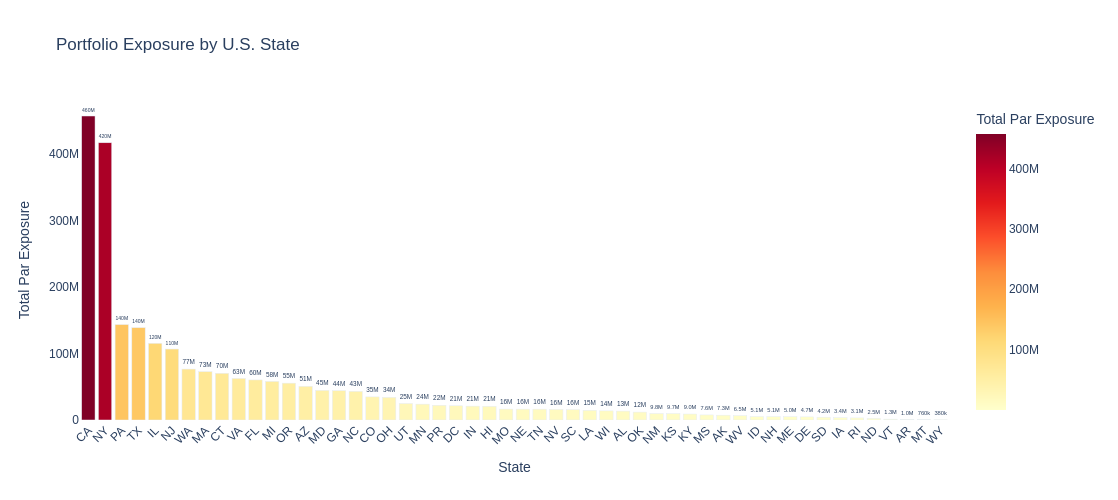

In [74]:
def analyze_geographic_diversity(df):

    if 'State' not in df.columns:
        print("The dataset does not contain a 'State' column. Please provide the correct column for geographic info.")
        return

    state_exposure = (
        df.groupby('State', observed=True)['Par']
        .sum()
        .reset_index()
        .sort_values(by='Par', ascending=False)
    )
    
    display(state_exposure)
    
    fig = px.bar(
        state_exposure,
        x='State',
        y='Par',
        text='Par',
        title='Portfolio Exposure by U.S. State',
        labels={'Par': 'Total Par Exposure'},
        color='Par',
        color_continuous_scale=shared_color_scale
    )
    
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(
        xaxis_tickangle=-45,
        width=1000,
        height=500,
        plot_bgcolor='white'
    )
    
    fig.show()


analyze_geographic_diversity(merged_data)
